# Maxwell's distribution of speed.

#### Import

In [38]:
import math as math
import random as random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Global constants

In [39]:
m = 3.2  # mass is in unit of Kb
Kb = 1.0


#### Input parameters

In [47]:
N = 100
u0 = 150.00
dv = 0.01

#### Starter 

In [48]:
def starter(key):
    u = [0.0  for k in range(N)]
    
    if key == 0:return u
    else:
        for k in range(N):
            u[k] = u0
     
   
    return u

#### Hamiltonian

In [49]:
def hamiltonian(u):
    H = 0.0
    for k in range(N):
          H = H + 0.5*u[k]**2
    return H

#### Pick a particle and change

In [50]:
def pick_random_particle():
    n = random.randint(0, N-1)
    return n

#### Thermalization

In [51]:
def thermalize(u,T,nruns):
    irun = 0
    h_stor = [0.0 for k in range(nrun)]
    while irun < nrun:
        L = len(u)
        h_old = hamiltonian(u)
        n = pick_random_particle()
        ov = u[n] 
        du = random.uniform(-dv,dv)
        u[n] = u[n] + du
        h_new = hamiltonian(u)
        dh = 0.5*m*(u[n]**2-ov**2)
        if dh < 0:         
            h_stor[irun] = h_new        
        else:                  
            frac = math.exp(-dh/(Kb*T))
            b = random.uniform(0.0,1.0)                  
            if  b < frac:        
                h_stor[irun] = h_new                             
            else:            
                u[n]  = u[n] - du
                h_stor[irun] = h_old 
        if u[n] != ov :                                                  
             irun = irun +1      
    return h_stor,u

#### Simulation

#### Test

In [52]:
N = 10
u = starter(1)
T = 300.0
nrun = 100
H,u = thermalize(u,T,nrun)

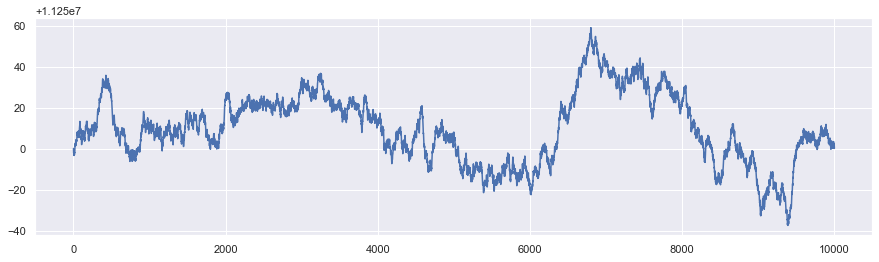

In [55]:
N = 1000
u = starter(1)
T = 300.0
nrun = 10000
H,u = thermalize(u,T,nrun)

X = np.arange(0,len(H),1)
plt.figure(figsize = [15,4])
plt.grid(True)
plt.plot(X,H,"-")
plt.show()           

#### Speed Distribution

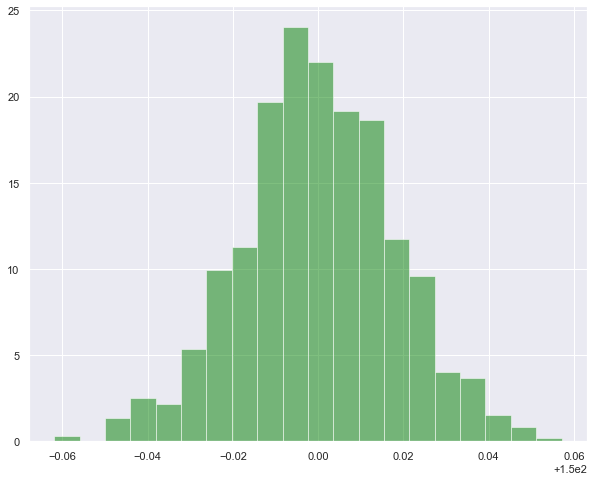

In [56]:
num_bins = 20
plt.figure(figsize = [10,8])
plt.hist(u,num_bins, density= 1.0, facecolor='green', alpha = 0.5)
plt.grid(True)
plt.show()

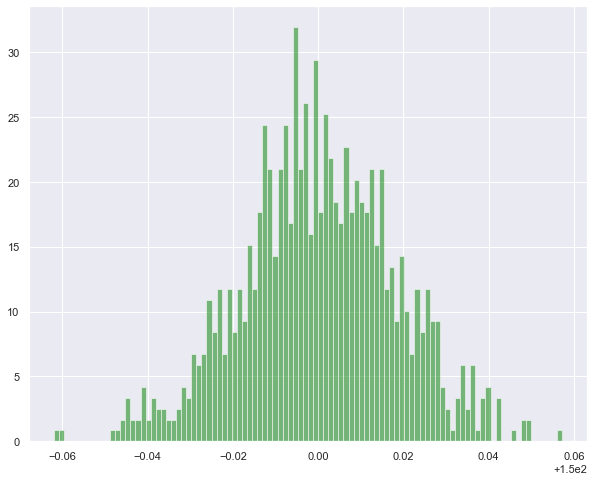

In [57]:
num_bins = 100
plt.figure(figsize = [10,8])
plt.hist(u,num_bins, density = 1.0, facecolor='green', alpha = 0.5)
plt.grid(True)
plt.show()